In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD,PCA,RandomizedPCA
from collections import Counter
import re
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
from matplotlib.colors import LogNorm
from datetime import date, timedelta,datetime
import calendar
from isoweek import Week
import seaborn as sns
from stop_words import get_stop_words
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

sns.set_style("whitegrid")
sns.set_context("poster")


from  config import *

In [2]:
authors = pd.read_csv(DATA_PATH+"authors_id.csv",index_col=0)
authors=authors[['id','displayName']]
df = pd.read_csv(DATA_PATH+"all_content.csv")
stop_words_en = get_stop_words('en')

In [3]:
df = pd.merge(df,authors,left_on='author_id',right_on='id',how='inner')

In [4]:
df=df[['displayName','content','collection_id','created_at']]
df.columns = ['author_name','content','collection_id','created_at']

In [5]:
df.head(1)

,author_name,content,collection_id,created_at
0,Kiev,NATO has already agreed (at 2pm EU time) to he...,81858342,1236267047


In [9]:
def word_count(df,author_name):
    df1 = df[df.author_name==author_name]
    content =df1.content.str.cat()
    words = re.split(r'\W+', content.lower())
    words = filter(lambda x: x.isalpha(), words)
    words = [word for word in words 
    if len(word) > 3 and word not in stop_words_en]
    
    word_count = Counter(words)
    return word_count


In [10]:
author_list =['Iron Knee', 'christopher c','Francheska (Maya) Smith-Johnson',
 'Njegos',
 'maljoffre',
 'Paul A. Myers',
 "Paul Munton's Potimarron",
 'TylerDurden',
 'Harold Godwinson',
 'Ealing',
 'MarkGB',
 'rrrahul',
 'Harry Lime',
 'Gulliver',
 'Good European',
 'Judyw',
 'Don10984408',
 'Apostle',
 'RiskAdjustedReturn',
 'Ric']


In [27]:
word_df = pd.DataFrame()
for author in author_list:
    word_counter = word_count(df,author)
    word_count_df = pd.DataFrame.from_dict(word_counter,
                                     orient='index')
#     file_df.columns = [fname.replace('input/papers/', '').replace('.txt', '')]
    word_count_df.ix[:, 0] = word_count_df.values.flatten() / float(word_count_df.values.sum())
    word_count_df.columns=[author]
    word_df = pd.merge(word_df,word_count_df,left_index=True,right_index=True,how='outer')

word_df = word_df.fillna(0)
print "Number of unique words: %s" % len(word_df)
word_df.head(10)

Number of unique words: 33971


,Iron Knee,christopher c,Francheska (Maya) Smith-Johnson,Njegos,maljoffre,Paul A. Myers,Paul Munton's Potimarron,TylerDurden,Harold Godwinson,Ealing,MarkGB,rrrahul,Harry Lime,Gulliver,Good European,Judyw,Don10984408,Apostle,RiskAdjustedReturn,Ric
aaib,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000023,0.000000,0.00000,0.0,0.0
aamer,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000169,0.0,0.000000,0.000000,0.00000,0.0,0.0
aaron,0.0,0.000000,0.0,0.000000,0.000000,0.000018,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
aarsal,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000081,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
aawsat,0.0,0.000000,0.0,0.000031,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
aawy,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000063,0.00000,0.0,0.0
abaaoud,0.0,0.000105,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
abaaoudcould,0.0,0.000021,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0
abacab,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000169,0.0,0.000000,0.000000,0.00007,0.0,0.0
aback,0.0,0.000000,0.0,0.000016,0.000022,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0


In [32]:
data =word_df.T
data.shape

(20, 33971)

In [95]:
labels = data.index.values

In [116]:
pca = TruncatedSVD(n_components=15, random_state=42)
X = pca.fit_transform(data) 
X.shape

(20, 15)

In [117]:
print pca.explained_variance_ratio_.sum()

0.897619370697


In [118]:
pca.explained_variance_ratio_*100

array([  1.76211312,  16.16859827,   9.78055399,   9.17471801,
         7.71189797,   6.98352259,   6.23619663,   5.33806498,
         4.90886818,   4.3843905 ,   4.13269868,   3.57685773,
         3.39551126,   3.13954037,   3.06840479])

In [119]:
df = pd.DataFrame({"name":labels})
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] =X[:,i]
df.head()

,name,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,Iron Knee,0.025659,0.014439,-0.001978,-0.000603,-0.002548,0.004586,0.015620,-0.006133,0.010955,-0.002387,-0.001094,0.002178,-0.001157,-0.002369,-0.000844
1,christopher c,0.029750,-0.001058,-0.000358,0.006792,0.016035,0.011337,-0.003212,-0.008140,0.001197,0.003067,0.002583,-0.001282,0.000052,0.002319,-0.000599
2,Francheska (Maya) Smith-Johnson,0.027409,0.015958,-0.001106,0.003836,-0.000742,-0.007315,0.003874,0.004261,-0.003814,0.006052,0.012718,0.000302,0.004419,0.001566,0.001124
3,Njegos,0.025015,0.006479,0.003335,0.002260,0.002021,-0.000044,-0.003351,0.000650,-0.002085,0.002035,0.000203,-0.000591,0.000106,0.000899,-0.000883
4,maljoffre,0.024367,0.005084,0.002426,0.002400,-0.001167,-0.001708,-0.002764,0.000906,-0.001635,-0.000197,-0.002521,0.000284,-0.001413,-0.000003,-0.000297


In [120]:
print labels.tolist()

['Iron Knee', 'christopher c', 'Francheska (Maya) Smith-Johnson', 'Njegos', 'maljoffre', 'Paul A. Myers', "Paul Munton's Potimarron", 'TylerDurden', 'Harold Godwinson', 'Ealing', 'MarkGB', 'rrrahul', 'Harry Lime', 'Gulliver', 'Good European', 'Judyw', 'Don10984408', 'Apostle', 'RiskAdjustedReturn', 'Ric']


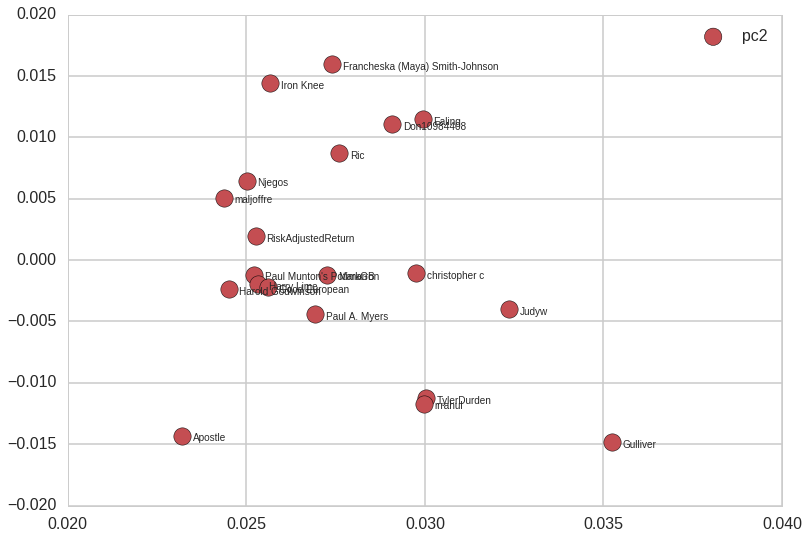

In [125]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
colors = [c0, c2]

fig, ax = plt.subplots() 
ax.scatter(df['pc1'], df['pc2'], c=color,s=300)
ax.set_xlim(.02, .04)
ax.set_ylim(-.02, .02)



for i, txt in enumerate(labels.tolist()):
    ax.annotate(txt, (df['pc1'].iloc[i]+.0003,df['pc2'].iloc[i]+.0002),fontsize=10,verticalalignment='top',horizontalalignment='left')
plt.legend()